<a href="https://colab.research.google.com/github/mdaugherity/Numerical2024/blob/main/fits/Week_6_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator

# Interpolation

Fitting is great for smoothing out statistical errors and data reduction, but finding the parameters can be rough.  A different approach is just to play connect-the-dots with your data points.  We call this method **interpolation**.

**References:**
* https://docs.scipy.org/doc/scipy/tutorial/interpolate.html
* https://numpy.org/devdocs/reference/generated/numpy.interp.html#numpy.interp
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline

## Warm-Up
Given two data points $(0, 10.5)$ and $(10,4)$, estimate the value at $x=5$.

In [2]:
# Class example - linear interpolation by hand
x1 = 0
y1 = 10.5
x2 = 10
y2 = 4

m = (y2-y1)/(x2-x1)
x = 5
y = m*(x-x1) + y1
print(y)

7.25


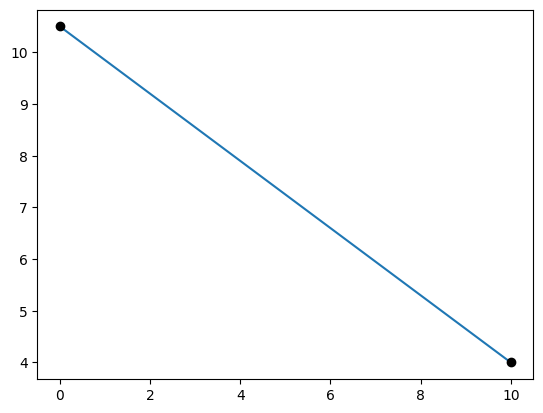

In [3]:
# Do lots of values of x to check
x = np.linspace(x1,x2)
y = m*(x-x1) + y1

plt.plot(x,y)
plt.plot([x1,x2], [y1,y2], 'ko')
plt.show()

# Linear With np.interp
Now the easy way.  Let's have ```np.interp``` do the work for us.

In [4]:
xdata = [x1,x2]
ydata = [y1,y2]
np.interp(5, xdata, ydata)

7.25

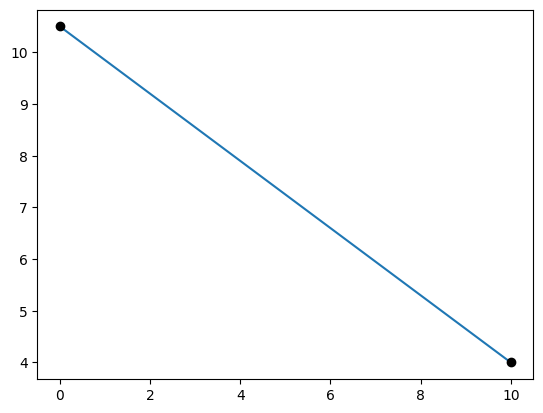

In [5]:
xint = np.linspace(x1,x2) # interpolated points

plt.plot(xint,np.interp(xint, xdata, ydata))
plt.plot(xdata, ydata, 'ko')
plt.show()

Remember that playing connect-the-dots isn't always a great representation of data

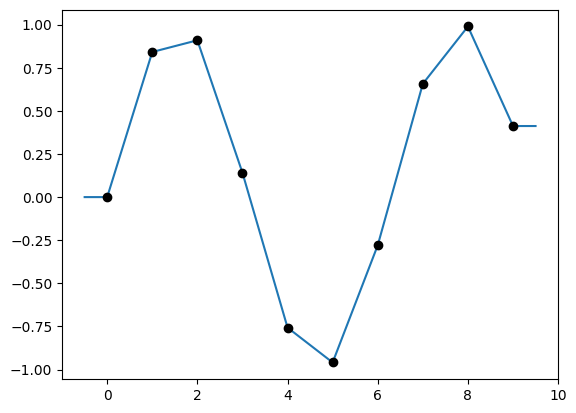

In [6]:
xdata = np.arange(10) # data points
ydata = np.sin(xdata)

xint = np.arange(-0.5, 9.6, 0.1) # interpolated points

plt.plot(xint, np.interp(xint, xdata, ydata),label='linear')
plt.plot(xdata,ydata,'ko', label='data')
plt.show()

# Cubic

Use ```scipy.interpolate.CubicSpline``` to get nicely smoothed interpolations.  

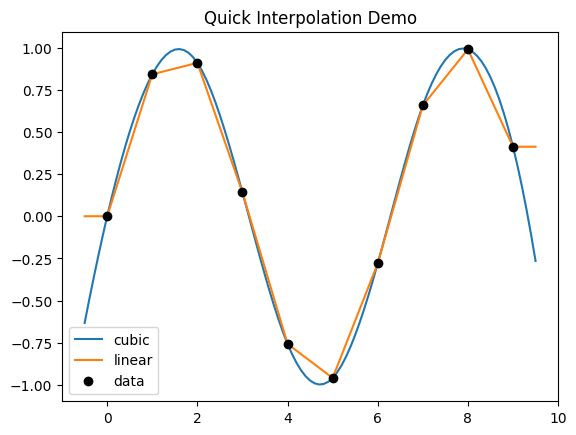

In [7]:
xdata = np.arange(10) # data points
ydata = np.sin(xdata)

cs = CubicSpline(xdata, ydata) # spline function

xs = np.arange(-0.5, 9.6, 0.1) # interpolated points
ys = cs(xs)

plt.plot(xs,ys, label='cubic')
plt.plot(xs, np.interp(xs, xdata, ydata),label='linear')
plt.plot(xdata,ydata,'ko', label='data')
plt.title('Quick Interpolation Demo')
plt.legend()
plt.show()

## Boundary Options

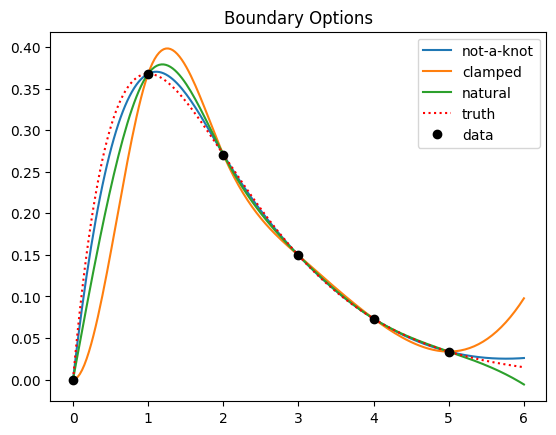

In [8]:
def fun1(x):
  return x*np.exp(-x)

xdata = np.arange(0,6)
ydata = fun1(xdata)

xs = np.linspace(0, 6, 200)

for bc in ['not-a-knot', 'clamped', 'natural']:
  cs = CubicSpline(xdata, ydata, bc_type=bc)
  plt.plot(xs, cs(xs), label=bc)

plt.plot(xs, fun1(xs), 'r:',label='truth')
plt.plot(xdata,ydata,'ko', label='data')
plt.title('Boundary Options')
plt.legend()
plt.show()

## Bonus tricks: Free-Fall Demo
We can use the resulting splines in useful ways

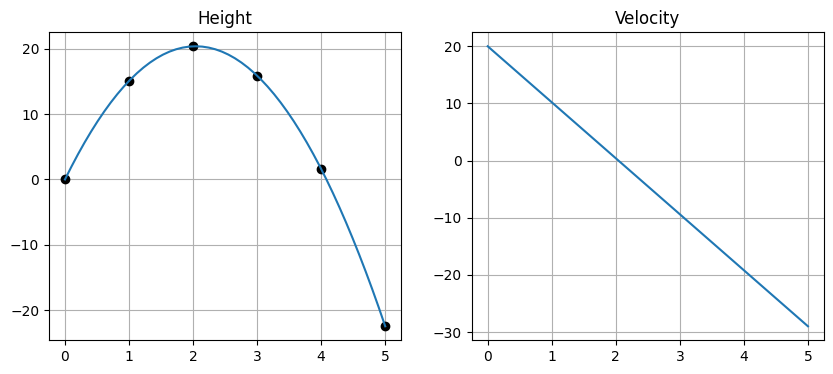

In [9]:
# Make fake data for object in free-fall
tdata = np.arange(0,6)
v0 = 20
g = 9.8
ydata = v0*tdata - 0.5*g*tdata**2

# Fit cubic spline
yspline = CubicSpline(tdata, ydata)
vspline = yspline.derivative()  # automatically get derivative

ts = np.linspace(0,5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(tdata, ydata, 'ko')
plt.plot(ts,yspline(ts))
plt.title('Height')
plt.grid()

plt.subplot(1,2,2)
plt.plot(ts,vspline(ts))
plt.title('Velocity')
plt.grid()

plt.show()

In [10]:
yspline.roots()

array([0.00000000e+00, 4.08163265e+00, 3.44806846e+14])

In [11]:
vspline.roots()

array([2.04081633e+00, 2.29871231e+14])

In [12]:
print('The ball hits the ground at: ', yspline.roots()[1])
print('The velocity is zero at: ', vspline.roots()[0])

The ball hits the ground at:  4.081632653061225
The velocity is zero at:  2.0408163265306123


# Example: Weather Problem
Given the weather forecast for times and temperatures:

|Time (PM)|Temp (F)|
|---|---|
|1:00|83|
|2:00|84|
|3:00|85|
|4:00|86|
|5:00|86|
|6:00|85|
|7:00|82|

Use interpolation to estimate the temperature at any time



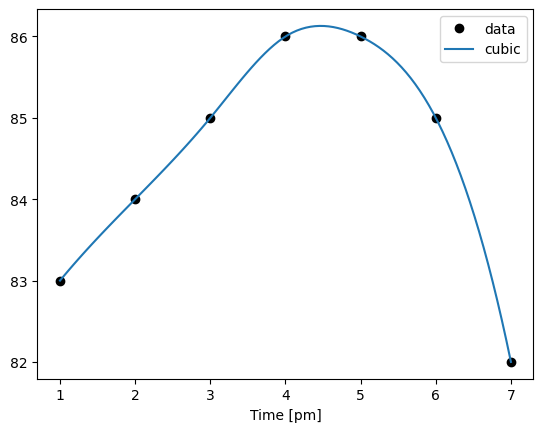

In [13]:
xdata = np.arange(1,8)
ydata = np.array([83,84,85,86,86,85,82])

cs = CubicSpline(xdata, ydata)

xint = np.linspace(1,7,100)

plt.plot(xdata, ydata,'ko', label='data')
plt.plot(xint, cs(xint), '-', label='cubic', )

plt.xlabel('Time [pm]')
plt.legend()
plt.show()

In [14]:
print('The temp at 3:30 PM is',cs(3.5))

The temp at 3:30 PM is 85.56696428571429


# PCHIP
There are many ways to do interpolation.  Usually you will want to use cubic splines.  I will mention one last option as a middle ground between linear and cubic: Piecewise Cubic Hermite Interpolating Polynomial.  Notice how this is smooth but still makes a bee-line for the next point.  This is guaranteed not to overshoot and oscillate.

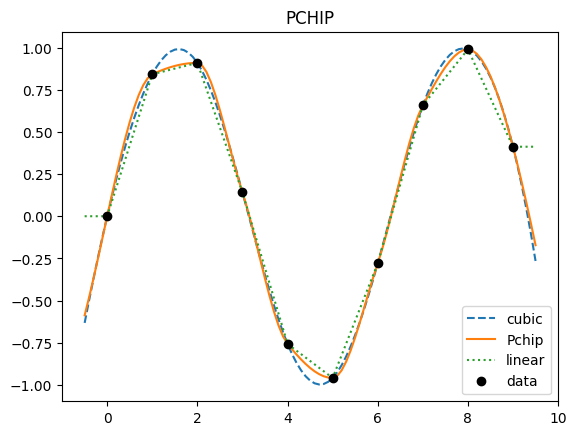

In [15]:
xdata = np.arange(10)
ydata = np.sin(xdata)
cs = CubicSpline(xdata, ydata)
csp = PchipInterpolator(xdata, ydata)

xs = np.arange(-0.5, 9.6, 0.1)

plt.plot(xs,cs(xs), '--', label='cubic')
plt.plot(xs,csp(xs), label='Pchip')
plt.plot(xs, np.interp(xs, xdata, ydata),':',label='linear')
plt.plot(xdata,ydata,'ko', label='data')
plt.title('PCHIP')
plt.legend()
plt.show()